# Лабораторная работа №7
**Студент**: Суханов Е.А.

**Группа**: М8О-406Б-19

**Задание**: Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением . Исследовать зависимость погрешности от сеточных параметров.

**Вариант**: 7

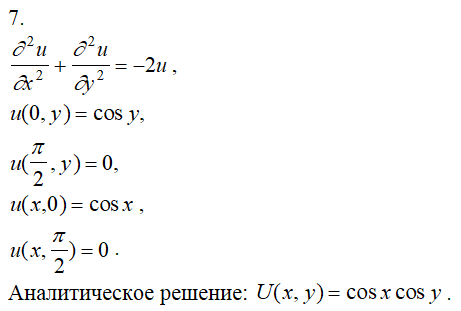

In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
class Task():
    def __init__(self, ux0, ux1, x0, x1 ,uy0, uy1, y0, y1, a):
        self.ux0 = ux0
        self.ux1 = ux1
        self.x0 = x0
        self.x1 = x1
        self.uy0 = uy0
        self.uy1 = uy1
        self.y0 = y0
        self.y1 = y1
        self.a = a
# Вариант 7
task = Task(
    ux0 = lambda y: np.cos(y),
    ux1 = lambda y: 0,
    x0 = 0,
    x1 = np.pi/2,
    uy0 = lambda x: np.cos(x),
    uy1 = lambda x: 0,
    y0 = 0,
    y1 = np.pi/2,
    a = -2,
)

analytic_func = lambda x,y: np.cos(x) * np.cos(y)

X_RES = 40
Y_RES = 40
X_0 = 0
X_1 = np.pi/2
Y_0 = 0
Y_1 = np.pi/2

In [144]:
 # Аналитическое решение
def analytic(x_0, x_1, y_0, y_1, func, x_res, y_res):
    x = (x_1 - x_0) / (x_res-1)
    y = (y_1 - y_0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(0, y_res):
        _y = y_0 + j * y
        for i in range(0, x_res):
            _x = x_0 + i * x
            u[j][i] = func(_x, _y)
    
    return u

In [145]:
analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, X_RES, Y_RES)
print(analytic_nodes)

[[1.00000000e+00 9.96584493e-01 9.86361303e-01 9.69400266e-01
  9.45817242e-01 9.15773327e-01 8.79473751e-01 8.37166478e-01
  7.89140509e-01 7.35723911e-01 6.77281572e-01 6.14212713e-01
  5.46948158e-01 4.75947393e-01 4.01695425e-01 3.24699469e-01
  2.45485487e-01 1.64594590e-01 8.25793455e-02 6.12323400e-17]
 [9.99188998e-01 9.95776261e-01 9.85561363e-01 9.68614081e-01
  9.45050182e-01 9.15030633e-01 8.78760496e-01 8.36487535e-01
  7.88500515e-01 7.35127237e-01 6.76732295e-01 6.13714585e-01
  5.46504582e-01 4.75561399e-01 4.01369649e-01 3.24436137e-01
  2.45286398e-01 1.64461104e-01 8.25123735e-02 6.11826804e-17]
 [9.96757308e-01 9.93352877e-01 9.83162838e-01 9.66256800e-01
  9.42750248e-01 9.12803756e-01 8.76621889e-01 8.34451805e-01
  7.86581570e-01 7.33338185e-01 6.75085356e-01 6.12221010e-01
  5.45174574e-01 4.74404042e-01 4.00392850e-01 3.23646569e-01
  2.44689453e-01 1.64060861e-01 8.23115661e-02 6.10337823e-17]
 [9.92708874e-01 9.89318270e-01 9.79169619e-01 9.62332247e-01
  9.3

In [146]:
# Метод простых итераций
def libman(task: Task, x_res, y_res, max_itr = 1000, eps = 0.0001):
    x = (task.x1 - task.x0) / (x_res-1)
    y = (task.y1 - task.y0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(y_res):
        _y = task.y0 + j * y
        u[j][0] = task.ux0(_y)
        u[j][-1] = task.ux1(_y)
    for i in range(x_res):
        _x = task.x0 + i * x
        u[0][i] = task.uy0(_x)
        u[-1][i] = task.uy1(_x)

    for itr in range(max_itr):
        new_u = np.copy(u)
        for i in range(1,y_res-1):
            for j in range(1,x_res-1):
                new_u[i][j] = (u[i][j-1] + u[i][j+1] + u[i+1][j] + u[i-1][j])/(4-task.a*x*y)
        
        if np.max(np.abs(new_u - u)) < eps:
            return new_u, itr
        u = new_u

    return u, max_itr 

In [147]:
libman_nodes = libman(task, X_RES, Y_RES)
print(libman_nodes)

(array([[1.00000000e+00, 9.96584493e-01, 9.86361303e-01, 9.69400266e-01,
        9.45817242e-01, 9.15773327e-01, 8.79473751e-01, 8.37166478e-01,
        7.89140509e-01, 7.35723911e-01, 6.77281572e-01, 6.14212713e-01,
        5.46948158e-01, 4.75947393e-01, 4.01695425e-01, 3.24699469e-01,
        2.45485487e-01, 1.64594590e-01, 8.25793455e-02, 6.12323400e-17],
       [9.99188998e-01, 9.73562891e-01, 9.48705909e-01, 9.21723951e-01,
        8.91343511e-01, 8.56964237e-01, 8.18317880e-01, 7.75327208e-01,
        7.28040079e-01, 6.76593913e-01, 6.21195256e-01, 5.62105787e-01,
        4.99633023e-01, 4.34122427e-01, 3.65951610e-01, 2.95524581e-01,
        2.23267171e-01, 1.49622170e-01, 7.50451457e-02, 0.00000000e+00],
       [9.96757308e-01, 9.56262087e-01, 9.19505971e-01, 8.83602793e-01,
        8.46828155e-01, 8.08157617e-01, 7.66988062e-01, 7.22983019e-01,
        6.75984253e-01, 6.25960597e-01, 5.72974794e-01, 5.17162835e-01,
        4.58718096e-01, 3.97880944e-01, 3.34929222e-01, 2.701

In [148]:
# Метод Зейделя
def seidel(task: Task, x_res, y_res, max_itr = 1000, eps = 0.0001):
    x = (task.x1 - task.x0) / (x_res-1)
    y = (task.y1 - task.y0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(y_res):
        _y = task.y0 + j * y
        u[j][0] = task.ux0(_y)
        u[j][-1] = task.ux1(_y)
    for i in range(x_res):
        _x = task.x0 + i * x
        u[0][i] = task.uy0(_x)
        u[-1][i] = task.uy1(_x)

    for itr in range(max_itr):
            new_u = np.copy(u)
            
            for i in range(1,y_res-1):
                for j in range(1,x_res-1):
                    new_u[i,j] = (new_u[i,j-1] + new_u[i,j+1] + new_u[i+1,j] + new_u[i-1,j])/(4-task.a*x*y)

            if np.max(np.abs(new_u - u)) < eps:
                return new_u, itr
            u = new_u
            
    return u, max_itr

In [149]:
seidel_nodes = seidel(task, X_RES, Y_RES)
print(seidel_nodes)

(array([[1.00000000e+00, 9.96584493e-01, 9.86361303e-01, 9.69400266e-01,
        9.45817242e-01, 9.15773327e-01, 8.79473751e-01, 8.37166478e-01,
        7.89140509e-01, 7.35723911e-01, 6.77281572e-01, 6.14212713e-01,
        5.46948158e-01, 4.75947393e-01, 4.01695425e-01, 3.24699469e-01,
        2.45485487e-01, 1.64594590e-01, 8.25793455e-02, 6.12323400e-17],
       [9.99188998e-01, 9.73619179e-01, 9.48818809e-01, 9.21892155e-01,
        8.91564007e-01, 8.57232450e-01, 8.18627636e-01, 7.75671027e-01,
        7.28409192e-01, 6.76978671e-01, 6.21585199e-01, 5.62490131e-01,
        5.00000767e-01, 4.34462867e-01, 3.66254466e-01, 2.95780482e-01,
        2.23467795e-01, 1.49760629e-01, 7.51161226e-02, 0.00000000e+00],
       [9.96757308e-01, 9.56375937e-01, 9.19734256e-01, 8.83942712e-01,
        8.47273636e-01, 8.08699219e-01, 7.67613409e-01, 7.23676794e-01,
        6.76728912e-01, 6.26736462e-01, 5.73760969e-01, 5.17937388e-01,
        4.59459074e-01, 3.98566625e-01, 3.35539117e-01, 2.706

In [150]:
# Метод простых итераций с верхней релаксацией
def libman_UR(task: Task, x_res, y_res, max_itr = 1000, eps = 0.0001, w = 1.8):
    x = (task.x1 - task.x0) / (x_res-1)
    y = (task.y1 - task.y0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(y_res):
        _y = task.y0 + j * y
        u[j][0] = task.ux0(_y)
        u[j][-1] = task.ux1(_y)
    for i in range(x_res):
        _x = task.x0 + i * x
        u[0][i] = task.uy0(_x)
        u[-1][i] = task.uy1(_x)

    for itr in range(max_itr):
        new_u = np.copy(u)
        for i in range(1,y_res-1):
            for j in range(1,x_res-1):
                new_u[i][j] = (new_u[i][j-1] + new_u[i][j+1] + new_u[i+1][j] + new_u[i-1][j])/(4-task.a*x*y)
                new_u[i,j] = (1 - w)*u[i][j] + w*new_u[i][j]
        
        if np.max(np.abs(new_u - u)) < eps:
            return new_u, itr
        u = new_u        
    
    return u, max_itr 

In [151]:
libman_UR_nodes = libman_UR(task, X_RES, Y_RES)
print(libman_UR_nodes)

(array([[1.00000000e+00, 9.96584493e-01, 9.86361303e-01, 9.69400266e-01,
        9.45817242e-01, 9.15773327e-01, 8.79473751e-01, 8.37166478e-01,
        7.89140509e-01, 7.35723911e-01, 6.77281572e-01, 6.14212713e-01,
        5.46948158e-01, 4.75947393e-01, 4.01695425e-01, 3.24699469e-01,
        2.45485487e-01, 1.64594590e-01, 8.25793455e-02, 6.12323400e-17],
       [9.99188998e-01, 9.73711425e-01, 9.48997826e-01, 9.22150045e-01,
        8.91890819e-01, 8.57616720e-01, 8.19057019e-01, 7.76132740e-01,
        7.28890111e-01, 6.77465472e-01, 6.22064576e-01, 5.62948941e-01,
        5.00431251e-01, 4.34860244e-01, 3.66606675e-01, 2.96070818e-01,
        2.23686864e-01, 1.49907305e-01, 7.51901039e-02, 0.00000000e+00],
       [9.96757308e-01, 9.56556270e-01, 9.20083929e-01, 8.84446427e-01,
        8.47912573e-01, 8.09451833e-01, 7.68456223e-01, 7.24584737e-01,
        6.77675492e-01, 6.27694488e-01, 5.74703316e-01, 5.18845847e-01,
        4.60319648e-01, 3.99355564e-01, 3.36227345e-01, 2.712

### Сравнение методов

In [158]:
# Вывод графика ошибки
def draw_error(analytic, x0, x1, y0, y1, numericals, suffix_labels):
    y_res, x_res = analytic.shape
    x = (x1 - x0) / (x_res-1)
    y = (y1 - y0) / (y_res-1)
    x = np.arange(x0, x1+x/2, x)
    y = np.arange(y0, y1+y/2, y)

    for n,l in zip(numericals, suffix_labels):
        err = np.max(np.abs(analytic - n), axis=0)
        print(f"mean err {l}: {np.mean(err)}")
        plt.plot(x, err, label = f'Ошибка {l}')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    plt.title('График изменения ошибки по координате x')
    plt.xlabel('t')
    plt.ylabel('error')
    plt.grid(True)
    plt.show()

    for n,l in zip(numericals, suffix_labels):
        err = np.max(np.abs(analytic - n), axis=1)
        print(f"mean err {l}: {np.mean(err)}")
        plt.plot(y, err, label = f'Ошибка {l}')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    plt.title('График изменения ошибки по координате y')
    plt.xlabel('t')
    plt.ylabel('error')
    plt.grid(True)
    plt.show()

mean err libman: 0.17649438922153654
mean err seidel: 0.1739262931700884
mean err libman_UR: 0.17125184867820437


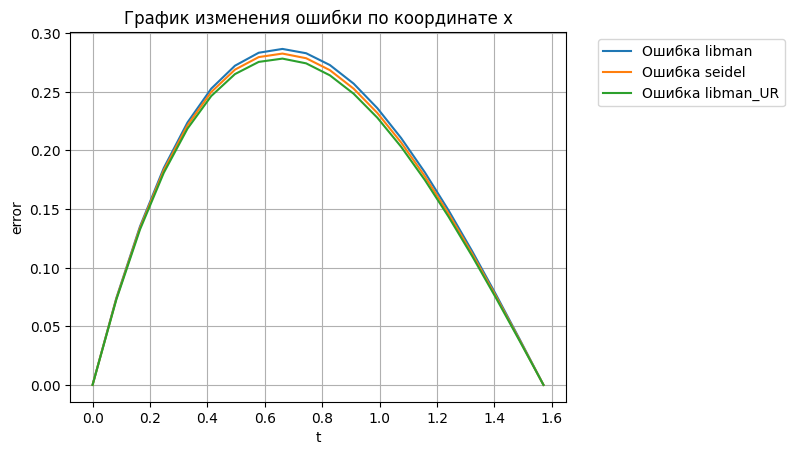

mean err libman: 0.1794455797063068
mean err seidel: 0.17659340640930676
mean err libman_UR: 0.17372125036131786


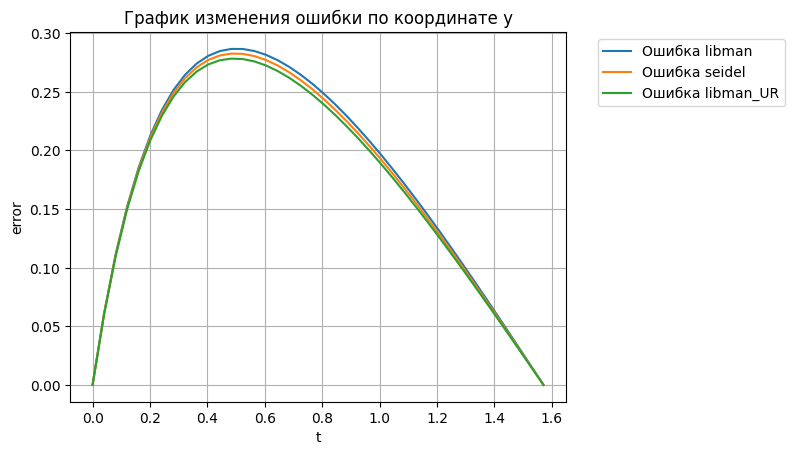

In [159]:
draw_error(analytic_nodes,  task.x0, task.x1, task.y0, task.x1,
        [libman_nodes[0], seidel_nodes[0], libman_UR_nodes[0]], ['libman', 'seidel', 'libman_UR'])

При этом, метод простой итерации с верхней релаксацией сошелся быстрее всего:

In [164]:
print("Количество итераций", 
    f"Метод простой итерации:\t\t\t\t{libman_nodes[1]}",
    f"Метод Зейделя:\t\t\t\t\t{seidel_nodes[1]}",
    f"Метод простой итерации c верхней релаксацией: \t{libman_UR_nodes[1]}", sep='\n')

Количество итераций
Метод простой итерации:				379
Метод Зейделя:					218
Метод простой итерации c верхней релаксацией: 	45


Узнаем зависимость количества итераций от параметра W в методе простой итерации с верхней релаксацией

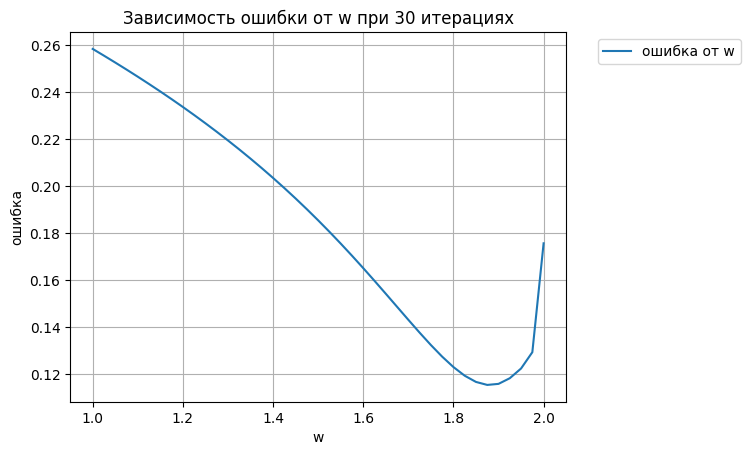

In [181]:
X_RES = 40
Y_RES = 40
MAX_ITR=30
STEP = 0.025
w_list = np.arange(1,2+STEP/2,STEP)
UR_v = []
analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, X_RES, Y_RES)
for w in w_list:
    nodes, itrs = libman_UR(task, X_RES, Y_RES, w = w, max_itr=MAX_ITR, eps=0)
    UR_v.append(np.mean(np.abs(analytic_nodes - nodes)))

plt.plot(w_list, UR_v, label = 'ошибка от w')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title(f'Зависимость ошибки от w при {MAX_ITR} итерациях')
plt.xlabel('w')
plt.ylabel('ошибка')
plt.grid(True)
plt.show()

### Исследование зависиомсти погрешности от размера сетки

200 200 200
200 200 200
200 200 200
200 200 200
200 200 200
200 200 200
200 200 200
200 200 200
200 200 200
200 200 200


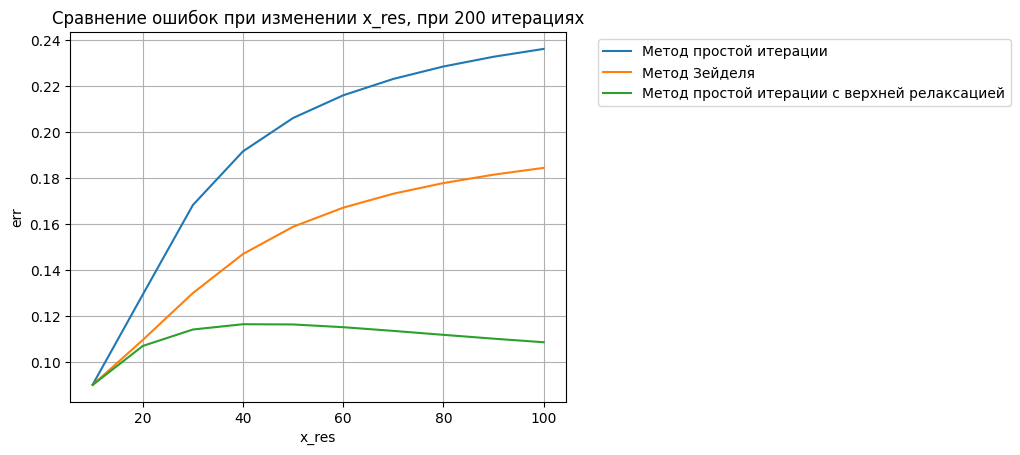

In [176]:
# Исследуем зависимость от X_RES при неизменном Y_RES
Y_RES = 40
X_RES_MIN = 10
X_RES_MAX = 100
X_RES_STEP = 10
MAX_ITR = 200
EPS = 0
W = 1.8

x_res_list = [x_res for x_res in range(X_RES_MIN, X_RES_MAX + X_RES_STEP // 2, X_RES_STEP)]

libman_v = []
seidel_v = []
libman_UR_v = []

for x_res in x_res_list:
    analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, x_res, Y_RES)
    libman_nodes, libman_itr = libman(task, x_res, Y_RES, max_itr=MAX_ITR, eps=EPS)
    seidel_nodes, seidel_itr = seidel(task, x_res, Y_RES, max_itr=MAX_ITR, eps=EPS)
    libman_UR_nodes, libman_UR_itr = libman_UR(task, x_res, Y_RES, max_itr=MAX_ITR, eps=EPS, w=W)
    get_err = lambda nodes: (np.mean(np.abs(analytic_nodes - nodes)))
    libman_v.append(get_err(libman_nodes))
    seidel_v.append(get_err(seidel_nodes)) 
    libman_UR_v.append(get_err(libman_UR_nodes)) 


plt.plot(x_res_list, libman_v, label = 'Метод простой итерации')
plt.plot(x_res_list, seidel_v, label = 'Метод Зейделя')
plt.plot(x_res_list, libman_UR_v, label = 'Метод простой итерации с верхней релаксацией')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title(f'Сравнение ошибок при изменении x_res, при {MAX_ITR} итерациях')
plt.xlabel('x_res')
plt.ylabel('err')
plt.grid(True)
plt.show()

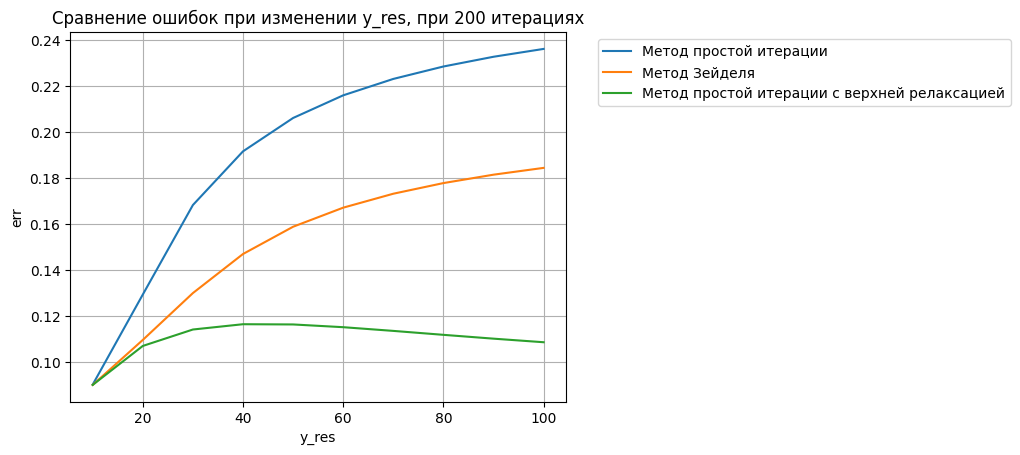

In [177]:
# Исследуем зависимость от Y_RES при неизменном X_RES
X_RES = 40
Y_RES_MIN = 10
Y_RES_MAX = 100
Y_RES_STEP = 10
MAX_ITR = 200
EPS = 0
W = 1.8

y_res_list = [y_res for y_res in range(Y_RES_MIN, Y_RES_MAX + Y_RES_STEP // 2, Y_RES_STEP)]

libman_v = []
seidel_v = []
libman_UR_v = []

for y_res in y_res_list:
    analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, X_RES, y_res)
    libman_nodes, libman_itr = libman(task, X_RES, y_res, max_itr=MAX_ITR, eps=EPS)
    seidel_nodes, seidel_itr = seidel(task, X_RES, y_res, max_itr=MAX_ITR, eps=EPS)
    libman_UR_nodes, libman_UR_itr = libman_UR(task, X_RES, y_res, max_itr=MAX_ITR, eps=EPS, w=W)
    get_err = lambda nodes: (np.mean(np.abs(analytic_nodes - nodes)))
    libman_v.append(get_err(libman_nodes))
    seidel_v.append(get_err(seidel_nodes)) 
    libman_UR_v.append(get_err(libman_UR_nodes)) 


plt.plot(x_res_list, libman_v, label = 'Метод простой итерации')
plt.plot(x_res_list, seidel_v, label = 'Метод Зейделя')
plt.plot(x_res_list, libman_UR_v, label = 'Метод простой итерации с верхней релаксацией')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title(f'Сравнение ошибок при изменении y_res, при {MAX_ITR} итерациях')
plt.xlabel('y_res')
plt.ylabel('err')
plt.grid(True)
plt.show()

### Выводы

Видно, что метод простой итерации с верхней релаксацией сходится быстрее всего.
При этом наблюдается минимум ошибки, после которого она начинает расти.

Метод Зейделя сходится лучше, чем метод простой итерации, но хуже, чем метод простой итерации с верхней релаксацией.

Метод простой итерации сходится хуже всего.

При увеличении размера сетки - ошибка растет, при неизменном количестве итераций.